# Assignment 02: Cluster Analisys
# Team 1: Mateusz Czarnecki, Jani Peltonen, Amal Kayed

Importing the required libraries


In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import seaborn as sn # a library for making statistical graphics
import matplotlib.pyplot as plt # a cross-platform, data visualization and graphical plotting library

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("drone_delivery_v1.csv", sep=';')
df = df.drop(['clientid'], axis=1)
df

,x,y
0,622.771572,164.857623
1,416.357298,630.193634
2,292.735020,567.333231
3,737.211288,166.225676
4,540.475375,682.912298
...,...,...
5951,832.857394,616.861410
5952,242.734500,490.325092
5953,108.690847,758.833921
5954,803.251074,430.740623


<AxesSubplot:xlabel='x', ylabel='y'>

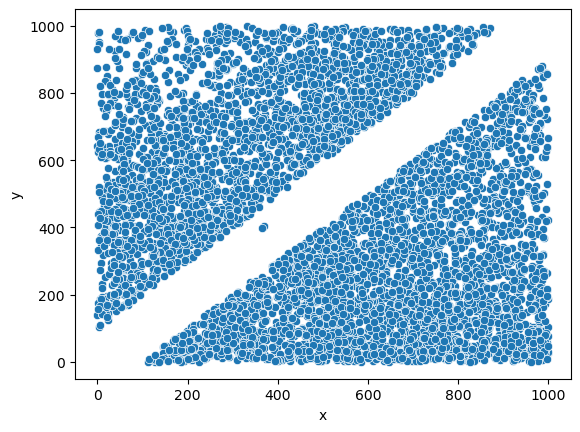

In [3]:
sn.scatterplot(x="x", y="y",  data=df, palette='viridis')

In [4]:
# scaler = StandardScaler()
# scale = scaler.fit_transform(df[['x', 'y']])
# scaled_df = pd.DataFrame(scale, columns=['x','y']);

# scaled_df.head()

In [5]:
kmeans_model = KMeans(n_clusters=3)
clusters = kmeans_model.fit_predict(df[['x','y']])

clusters

array([2, 1, 0, ..., 0, 2, 2], dtype=int32)

## Centers

In [24]:
centers = kmeans_model.cluster_centers_
centers_df = pd.DataFrame(centers, columns=[['x','y']])
centers_df

,xc,yc
0,198.540738,383.080978
1,548.205865,787.278896
2,702.213116,211.327341


In [16]:
df['Clusters'] = kmeans_model.labels_
df.head()

,x,y,Clusters
0,622.771572,164.857623,2
1,416.357298,630.193634,1
2,292.735020,567.333231,0
3,737.211288,166.225676,2
4,540.475375,682.912298,1


[Text(0.5, 1.0, 'Clusters')]

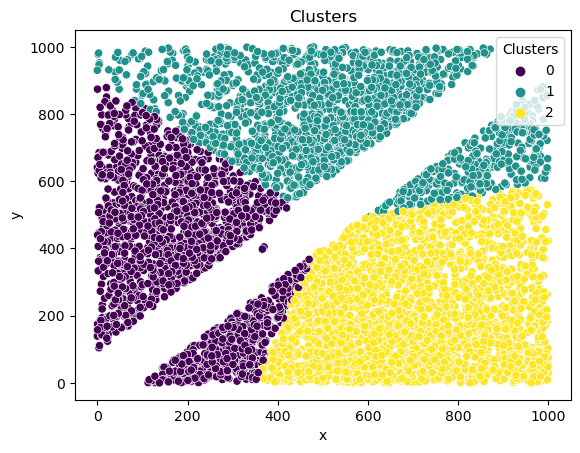

In [19]:
sn.scatterplot(x="x", y="y",hue = 'Clusters',  data=df, palette='viridis').set(title="Clusters")

In [26]:
sn.scatterplot(x="xc", y="yc", data=centers_df)

ValueError: If using all scalar values, you must pass an index